In [75]:
import pandas as pd

In [76]:
# Loading data
df = pd.read_csv('Anonymize_Loan_Default_data.csv', encoding='latin1', index_col=0)
df.head().style.background_gradient(cmap='turbo')

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,repay_fail
2,2,2,0.000000,0.000000,0.000000,36 months,0.000000,0.000000,< 1 year,RENT,0.000000,Not Verified,Dec-99,Charged Off,major_purchase,000xx,ZZ,0.000000,0.000000,Jan-01,0.000000,nan,0.000000,0.000000,0.000000,0.00%,1.000000,0.000000,0.000000,0.000000,0.000000,Jan-07,0.000000,Jan-07,Jan-07,1
3,545583,703644,2500.000000,2500.000000,2500.000000,36 months,13.980000,85.420000,4 years,RENT,20004.000000,Not Verified,Jul-10,Does not meet the credit policy. Status:Fully Paid,other,487xx,MI,19.860000,0.000000,Aug-05,5.000000,nan,7.000000,0.000000,981.000000,21.30%,10.000000,3075.291779,3075.290000,2500.000000,575.290000,Jul-13,90.850000,Aug-13,Jun-16,0
4,532101,687836,5000.000000,5000.000000,5000.000000,36 months,15.950000,175.670000,4 years,RENT,59000.000000,Not Verified,Jun-10,Charged Off,debt_consolidation,115xx,NY,19.570000,0.000000,Apr-94,1.000000,59.000000,7.000000,0.000000,18773.000000,99.90%,15.000000,2948.760000,2948.760000,1909.020000,873.810000,Nov-11,175.670000,nan,Mar-12,1
5,877788,1092507,7000.000000,7000.000000,7000.000000,36 months,9.910000,225.580000,10+ years,MORTGAGE,53796.000000,Not Verified,Sep-11,Fully Paid,other,751xx,TX,10.800000,3.000000,Mar-98,3.000000,3.000000,7.000000,0.000000,3269.000000,47.20%,20.000000,8082.391880,8082.390000,7000.000000,1082.390000,Mar-14,1550.270000,nan,Mar-14,0
6,875406,1089981,2000.000000,2000.000000,2000.000000,36 months,5.420000,60.320000,10+ years,RENT,30000.000000,Not Verified,Sep-11,Fully Paid,debt_consolidation,112xx,NY,3.600000,0.000000,Jan-75,0.000000,72.000000,7.000000,0.000000,0.000000,0%,15.000000,2161.663244,2161.660000,2000.000000,161.660000,Feb-14,53.120000,nan,Jun-16,0


In [77]:
# Statistical Summary
print(f"Number of columns: {df.shape[1]}\nNumber of rows: {df.shape[0]}")
df.describe().T.style.background_gradient(cmap='turbo')

Number of columns: 36
Number of rows: 38480


,count,mean,std,min,25%,50%,75%,max
id,38480.000000,664997.930016,219232.159934,1.000000,498364.500000,644319.500000,826560.750000,1077430.000000
member_id,38480.000000,826189.854288,279353.137600,1.000000,638462.000000,824254.500000,1034706.500000,1314167.000000
loan_amnt,38479.000000,11094.727644,7405.416042,0.000000,5200.000000,9750.000000,15000.000000,35000.000000
funded_amnt,38479.000000,10831.856337,7146.853682,0.000000,5100.000000,9600.000000,15000.000000,35000.000000
funded_amnt_inv,38479.000000,10150.141518,7128.026828,0.000000,4950.000000,8495.792749,14000.000000,35000.000000
int_rate,38480.000000,12.164300,3.737440,0.000000,9.620000,11.990000,14.720000,100.990000
installment,38479.000000,323.163255,209.089097,0.000000,165.740000,277.980000,429.350000,1305.190000
annual_inc,38478.000000,68995.308917,64476.388744,0.000000,40000.000000,58650.000000,82000.000000,6000000.000000
dti,38480.000000,13.378119,6.744356,0.000000,8.200000,13.485000,18.690000,100.000000
delinq_2yrs,38479.000000,0.151927,0.507592,0.000000,0.000000,0.000000,0.000000,11.000000


In [78]:
# Missing value percentage
null_percentages = (df.isna().sum() / len(df)) * 100
null_df = pd.DataFrame({'Column': null_percentages.index, 'Null Percentage': null_percentages.values})
null_df['Null Percentage'] = null_df['Null Percentage'].astype(int)
sorted_null_df = null_df.sort_values(by='Null Percentage', ascending=False)
sorted_null_df.head().style.background_gradient(cmap='turbo')

,Column,Null Percentage
33,next_pymnt_d,91
21,mths_since_last_delinq,63
8,emp_length,2
0,id,0
27,total_pymnt,0


In [79]:
# Handling missing values
# Drop columns with null value percentages over 40%
df.drop(sorted_null_df[sorted_null_df['Null Percentage'] >= 40]['Column'], axis=1, inplace=True)
# Drop rows with any remaining null values
df.dropna(inplace=True)

print(f"Number of rows: {df.shape[0]}")

Number of rows: 37359


In [80]:
# Removing Duplicates
df.drop_duplicates(inplace=True)

In [81]:
# Handing outliers using interquartile range mask
numeric_columns = df.select_dtypes(include='number')
Q1 = numeric_columns.quantile(0.25)
Q3 = numeric_columns.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_outliers = (numeric_columns < lower_bound)
upper_outliers = (numeric_columns > upper_bound)
outliers_mask = lower_outliers | upper_outliers
df = df[~outliers_mask.any(axis=1)]

print(f"Number of rows: {df.shape[0]}")

Number of rows: 19455


In [82]:
df.select_dtypes(include='object').head()

,term,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,earliest_cr_line,revol_util,last_pymnt_d,last_credit_pull_d
3,36 months,4 years,RENT,Not Verified,Jul-10,Does not meet the credit policy. Status:Fully ...,other,487xx,MI,Aug-05,21.30%,Jul-13,Jun-16
6,36 months,10+ years,RENT,Not Verified,Sep-11,Fully Paid,debt_consolidation,112xx,NY,Jan-75,0%,Feb-14,Jun-16
9,36 months,3 years,RENT,Not Verified,May-11,Fully Paid,debt_consolidation,658xx,MO,Oct-03,47.70%,May-14,May-14
13,36 months,5 years,RENT,Source Verified,Mar-09,Fully Paid,credit_card,959xx,CA,Jun-90,61.90%,Apr-12,Mar-12
15,36 months,4 years,MORTGAGE,Verified,Nov-10,Fully Paid,debt_consolidation,775xx,TX,Dec-89,65.10%,Dec-13,Jun-16


In [83]:
# Convert columns with date-based values to datetime with specified format
date_columns = ['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d']
df[date_columns] = df[date_columns].apply(lambda x: pd.to_datetime(x, format='%b-%y', errors='coerce'))
df.select_dtypes(include='object').head()

,term,emp_length,home_ownership,verification_status,loan_status,purpose,zip_code,addr_state,revol_util
3,36 months,4 years,RENT,Not Verified,Does not meet the credit policy. Status:Fully ...,other,487xx,MI,21.30%
6,36 months,10+ years,RENT,Not Verified,Fully Paid,debt_consolidation,112xx,NY,0%
9,36 months,3 years,RENT,Not Verified,Fully Paid,debt_consolidation,658xx,MO,47.70%
13,36 months,5 years,RENT,Source Verified,Fully Paid,credit_card,959xx,CA,61.90%
15,36 months,4 years,MORTGAGE,Verified,Fully Paid,debt_consolidation,775xx,TX,65.10%


In [84]:
# Convert 'emp_length' column to integer
df['emp_length'] = df['emp_length'].str.extract(r'(\d+)').astype(float).fillna(0).astype(int)
df.select_dtypes(include='object').head()

,term,home_ownership,verification_status,loan_status,purpose,zip_code,addr_state,revol_util
3,36 months,RENT,Not Verified,Does not meet the credit policy. Status:Fully ...,other,487xx,MI,21.30%
6,36 months,RENT,Not Verified,Fully Paid,debt_consolidation,112xx,NY,0%
9,36 months,RENT,Not Verified,Fully Paid,debt_consolidation,658xx,MO,47.70%
13,36 months,RENT,Source Verified,Fully Paid,credit_card,959xx,CA,61.90%
15,36 months,MORTGAGE,Verified,Fully Paid,debt_consolidation,775xx,TX,65.10%


In [85]:
# Print the number of unique values for each categorical column
categorical_columns = ['term', 'home_ownership', 'verification_status', 'purpose', 'zip_code', 'addr_state']
for col in categorical_columns:
    unique_count = df[col].nunique()
    print(f"Number of unique values in {col}: {unique_count}")

Number of unique values in term: 2
Number of unique values in home_ownership: 5
Number of unique values in verification_status: 3
Number of unique values in purpose: 14
Number of unique values in zip_code: 788
Number of unique values in addr_state: 50


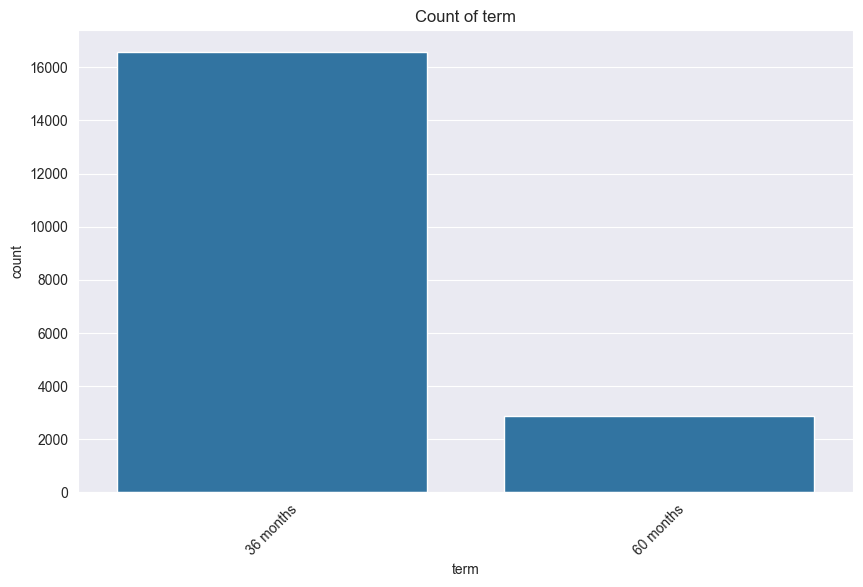

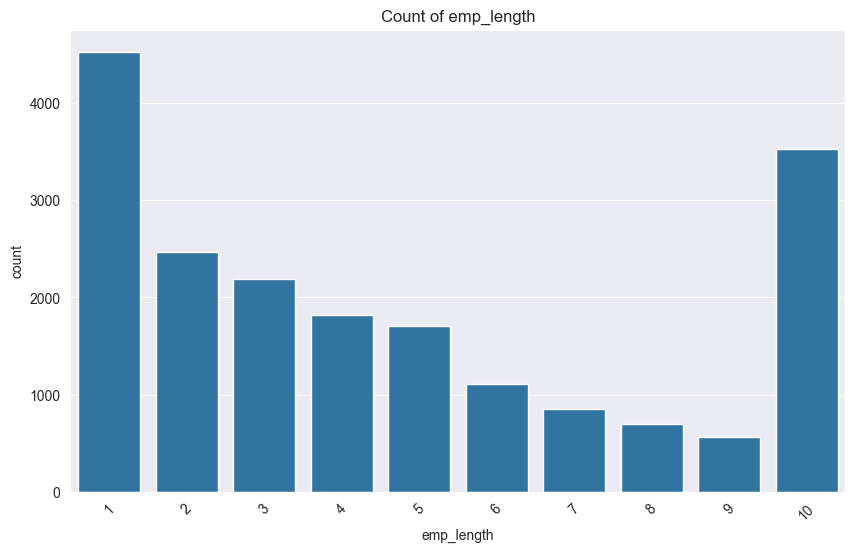

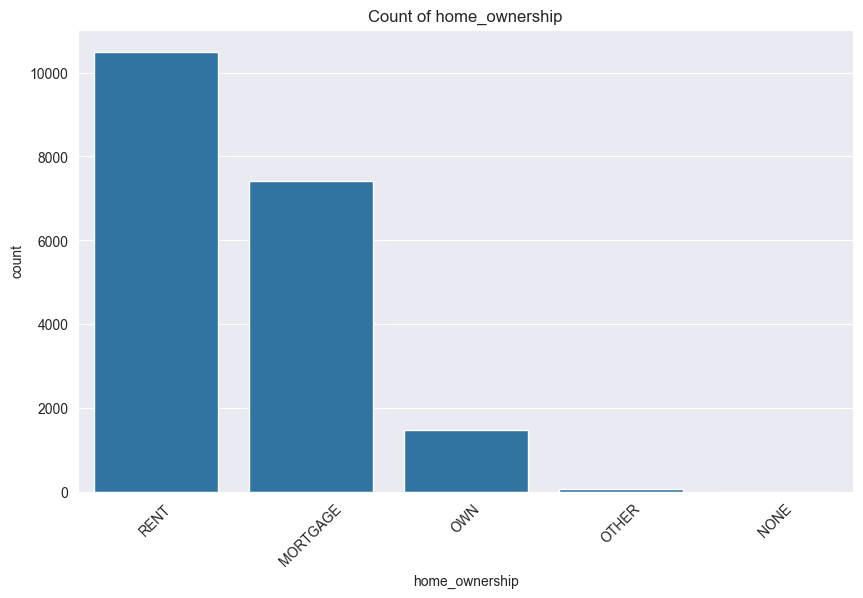

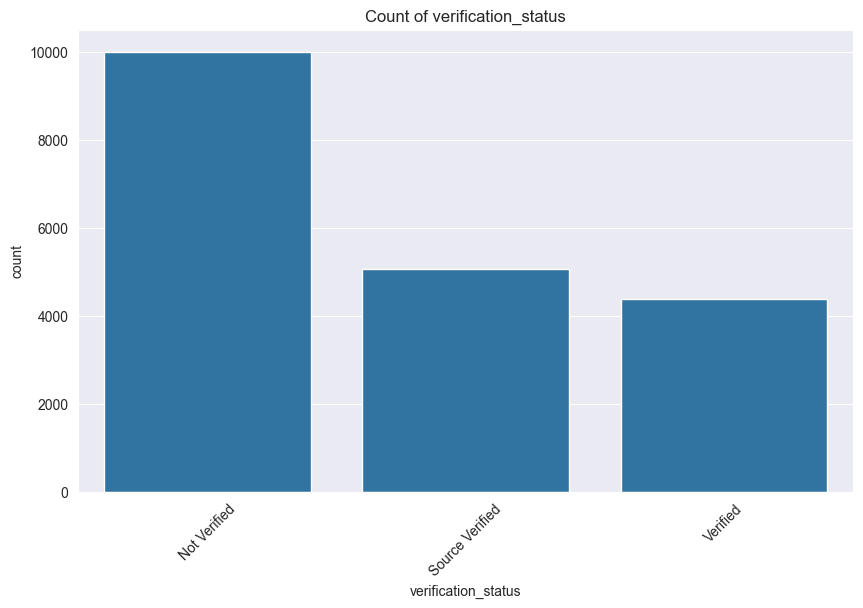

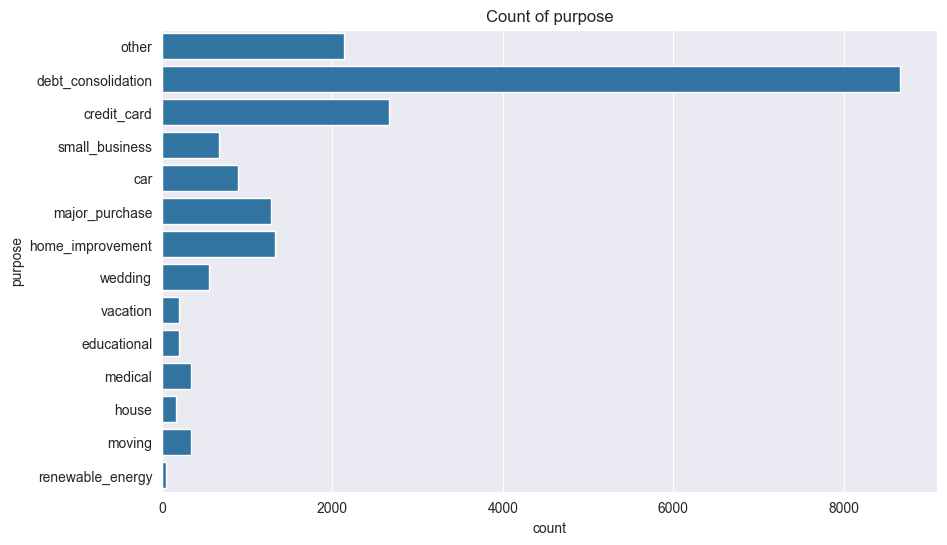

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of categorical columns
categorical_columns = ['term', 'emp_length', 'home_ownership', 'verification_status', 'purpose']

# Plot each categorical column
for col in categorical_columns:
    if df[col].nunique() <= 10:  # If the number of unique categories is small, use a bar plot or count plot
        plt.figure(figsize=(10, 6))
        sns.countplot(data=df, x=col)
        plt.title(f'Count of {col}')
        plt.xticks(rotation=45)
        plt.show()
    elif df[col].nunique() <= 30:  # If the number of unique categories is moderate, use a bar plot or count plot
        plt.figure(figsize=(10, 6))
        sns.countplot(data=df, y=col)
        plt.title(f'Count of {col}')
        plt.show()
    else:  # If the number of unique categories is large, consider other visualization techniques like heatmap
        plt.figure(figsize=(10, 6))
        sns.heatmap(df.groupby([col, 'loan_status']).size().unstack(), cmap='viridis', annot=True, fmt='d')
        plt.title(f'Heatmap of {col} vs Loan Status')
        plt.show()


In [87]:
from sklearn.model_selection import train_test_split

# Splitting the data into features and target variable
X = df.drop(["repay_fail"], axis=1)  # Features
y = df["repay_fail"]  # Target variable

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [88]:
import tensorflow as tf
# Convert NumPy arrays to TensorFlow tensors
X_train_tensor = tf.constant(X_train, dtype=tf.float32)
X_test_tensor = tf.constant(X_test, dtype=tf.float32)
y_train_tensor = tf.constant(y_train, dtype=tf.float32)
y_test_tensor = tf.constant(y_test, dtype=tf.float32)

# Create TensorFlow datasets
train_dataset = tf.data.Dataset.from_tensor_slices((X_train_tensor, y_train_tensor))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test_tensor, y_test_tensor))

# Shuffle and batch the datasets
batch_size = 32
train_dataset = train_dataset.shuffle(buffer_size=len(X_train)).batch(batch_size)
test_dataset = test_dataset.batch(batch_size)

# Define the neural network architecture
ann_classifier = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.001, l2=0.001)),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.001, l2=0.001)),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.001, l2=0.001)),
    tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.001, l2=0.001)),
    tf.keras.layers.Dense(1, activation='sigmoid', kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.001, l2=0.001))
])

# Compile the model
ann_classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
ann_classifier.fit(train_dataset, epochs=10, validation_data=test_dataset)

# Evaluate the model
test_loss, test_accuracy = ann_classifier.evaluate(test_dataset)
print("Test Accuracy:", test_accuracy)

# Make predictions
y_pred_probabilities = ann_classifier.predict(test_dataset)
y_pred_ann = (y_pred_probabilities > 0.5).astype(int)

ValueError: could not convert string to float: '36 months'

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
# Compute confusion matrix
conf_matrix_ann = confusion_matrix(y_test, y_pred_ann)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_ann, annot=True, fmt="d", cmap="Blues", cbar=False,
            annot_kws={"fontsize": 14}, linewidths=0.5, linecolor='black')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred_ann))